In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import itertools

In [3]:
X, y = load_digits(return_X_y=True)
print('Formato del dataset: {}'.format(X.shape))
print('Formato de las etiquetas: {}'.format(y.shape))

Formato del dataset: (1797, 64)
Formato de las etiquetas: (1797,)


In [4]:
clases = np.unique(y)
print(clases)

[0 1 2 3 4 5 6 7 8 9]


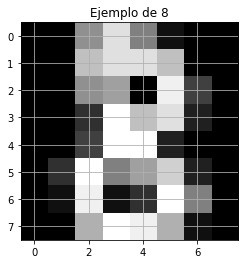

In [5]:
plt.grid(True)
plt.title("Ejemplo de {}".format(y[8]))
plt.imshow(X[8, :].reshape((8, 8)), cmap='gray')
plt.show()

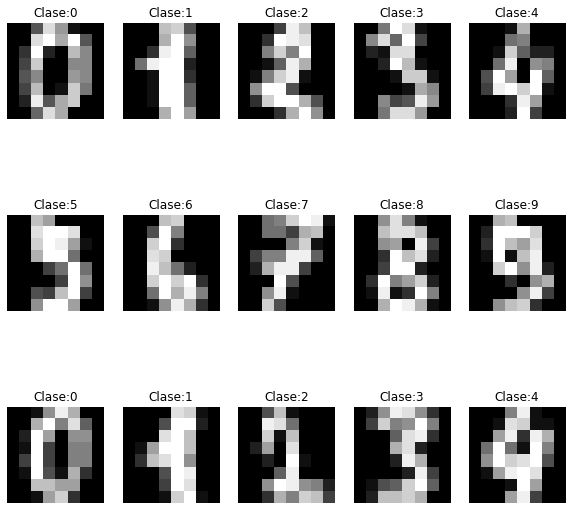

In [6]:
fig = plt.figure(figsize=(10, 10))
for i in range(15):  
    ax = fig.add_subplot(3, 5, i+1)
    ax.imshow(X[i].reshape(8, 8), cmap=plt.get_cmap('gray'))
    ax.set_title('Clase:{y}'.format(y=y[i]))
    plt.axis('off')
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [8]:
X_train.shape

(1437, 64)

In [9]:
y_train.shape

(1437,)

### Modelo

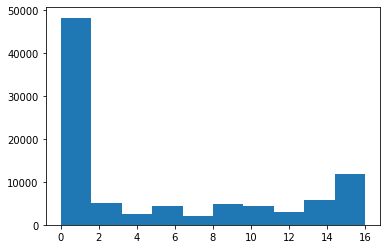

In [10]:
f, ax = plt.subplots()

ax.hist(X_train.flatten())

plt.show()

In [11]:
np.max(X_train)

16.0

In [19]:
X_train_s = X_train / 16
X_test_s = X_test / 16

In [23]:
lr = SGDClassifier(loss = 'log', l1_ratio=0.01, verbose=0, max_iter=1000, penalty='l1', alpha=0.001)
lr.fit(X_train_s, y_train)

SGDClassifier(alpha=0.001, l1_ratio=0.01, loss='log', penalty='l1')

In [30]:
predictions = lr.predict(X_test_s)

In [33]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.9638888888888889

### Matriz de Confusión

In [63]:
cf_matrix = confusion_matrix(y_test, predictions)
cf_matrix = cf_matrix.astype('float') / cf_matrix.sum(axis=1)

In [64]:
def plotConfusionMatrix(cf_matrix):
    plt.figure(figsize=(15,15))
    plt.imshow(cf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()

    tick_marks = np.arange(10)
    plt.xticks(tick_marks, np.arange(10) , rotation=45)
    plt.yticks(tick_marks, np.arange(10))

    fmt = '.2f'
    thresh = cf_matrix.max() / 2.

    for i, j in itertools.product(range(cf_matrix.shape[0]), range(cf_matrix.shape[1])):
        plt.text(j, i, format(cf_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cf_matrix[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

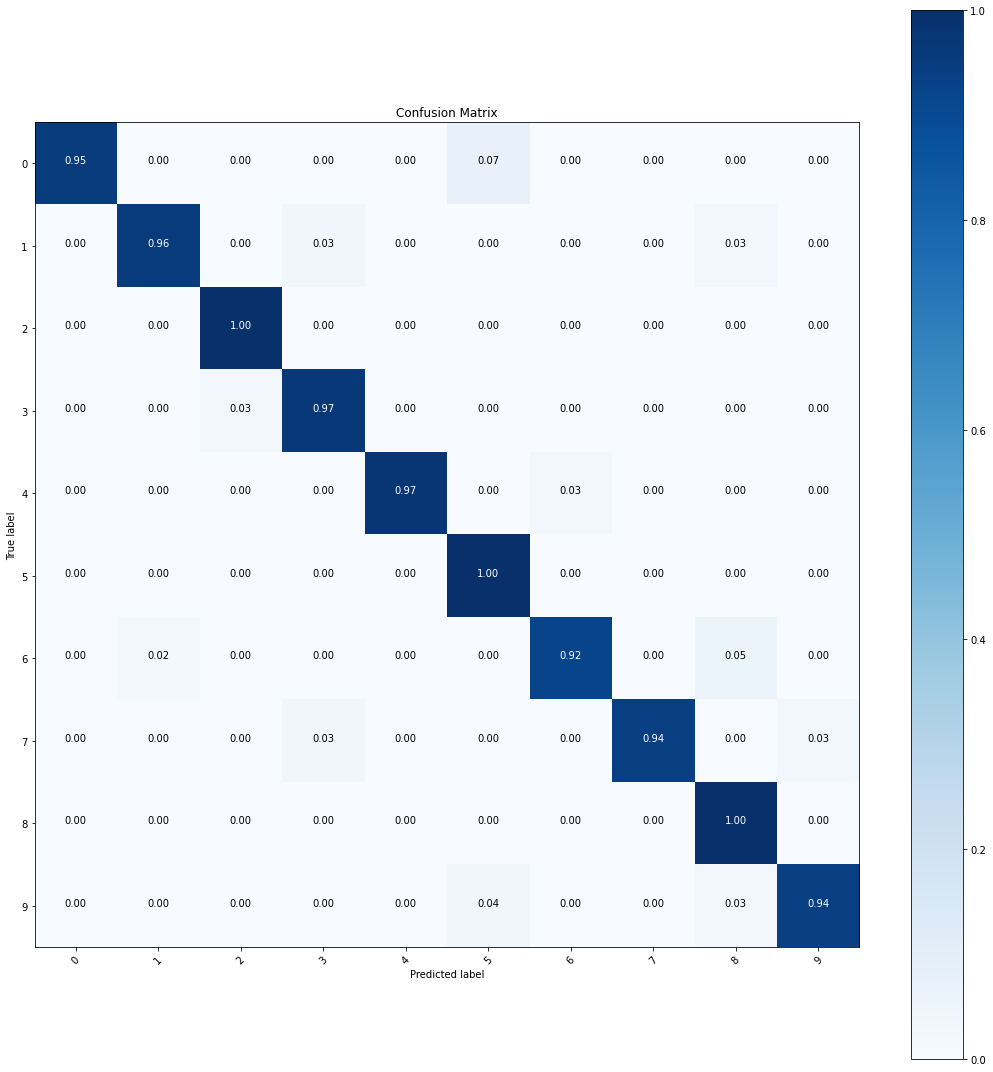

In [65]:
plotConfusionMatrix(cf_matrix)

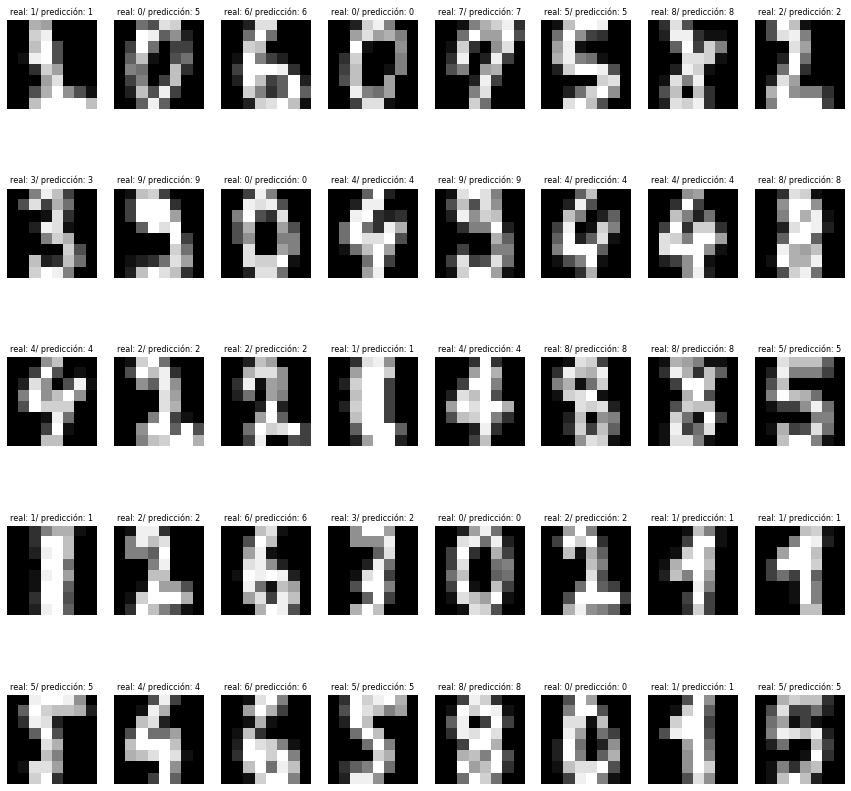

In [66]:
fig = plt.figure(figsize=(15,15))

for i in range(40):  
    ax = fig.add_subplot(5, 8, i+1)
    ax.imshow(X_test[i].reshape(8, 8), cmap=plt.get_cmap('gray'))    
    ax.set_title('real: {y}/ predicción: {y_hat}'.format(y=y_test[i], y_hat=predictions[i]), fontsize=8)
    plt.axis('off')